# LIBRERIAS

In [ ]:
#instalaciones
!pip install yfinance
!pip install tensorflow
!pip install pandas_ta
!pip install hyperopt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 13.4 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=40312e61725290b38456d64bf3ae7f3ef236c80bc77c3476a395e503eb2784cd
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#librerias metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# busquda de parametros
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials
import pandas as pd
#import MetaTrader5 as mt5
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import tensorflow as t
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as pt
from sklearn.preprocessing import MinMaxScaler

import math
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM
import numpy as np
import pandas as pd
import pandas_ta as ta
import sklearn.preprocessing as prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_PEN= pd.read_csv('/content/drive/MyDrive/datasets stmkt/pen_usd-08-19.csv',sep=';')

In [ ]:
data_PEN = yf.download("PEN=X", start="2008-01-01", end="2017-12-30", period="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_PEN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-01,2.9640,2.9640,2.9640,2.9640,2.9640,0
2008-01-02,2.9810,2.9810,2.9780,2.9363,2.9363,0
2008-01-03,2.9378,2.9378,2.9307,2.9307,2.9307,0
2008-01-04,2.9312,2.9680,2.9312,2.9065,2.9065,0
2008-01-07,2.9294,2.9294,2.9294,2.9292,2.9292,0
...,...,...,...,...,...,...
2017-12-25,3.1996,3.2331,3.1927,3.1959,3.1959,0
2017-12-26,3.1943,3.2382,3.1943,3.1931,3.1931,0
2017-12-27,3.1953,3.2423,3.1953,3.1969,3.1969,0


# PROCESAMIENTO DE DATA

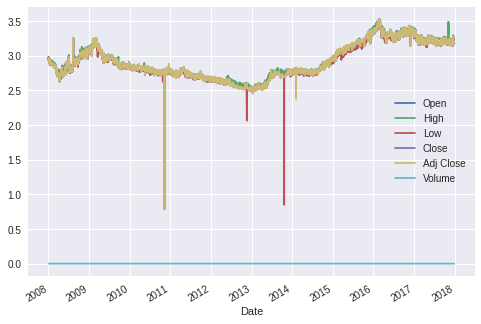

In [ ]:
data_PEN.plot()

In [ ]:
data_PEN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2604 entries, 2008-01-01 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2604 non-null   float64
 1   High       2604 non-null   float64
 2   Low        2604 non-null   float64
 3   Close      2604 non-null   float64
 4   Adj Close  2604 non-null   float64
 5   Volume     2604 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.4 KB


In [ ]:
data_PEN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.0
mean,2.889695,2.930717,2.884421,2.913787,2.913787,0.0
std,0.244482,0.255663,0.250340,0.252106,0.252106,0.0
min,2.479700,2.484800,0.784400,0.784400,0.784400,0.0
25%,2.715675,2.736925,2.713550,2.732975,2.732975,0.0
50%,2.804550,2.845800,2.801600,2.838550,2.838550,0.0
75%,3.129350,3.176050,3.121150,3.163025,3.163025,0.0
max,3.486200,3.529500,3.454400,3.530000,3.530000,0.0


In [ ]:
data_PEN.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data_PEN['Close']=data_PEN['Close'].replace(0.0,2.83) #50% de los datos close

In [ ]:
data_PEN.ta.log_return(cumulative=True, append=True)
data_PEN.ta.percent_return(cumulative=True, append=True)
data_PEN.tail()

,Open,High,Low,Close,Adj Close,Volume,CUMLOGRET_1,CUMPCTRET_1
Date,,,,,,,,
2017-12-25,3.1996,3.2331,3.1927,3.1959,3.1959,0,0.075329,0.078239
2017-12-26,3.1943,3.2382,3.1943,3.1931,3.1931,0,0.074453,0.077294
2017-12-27,3.1953,3.2423,3.1953,3.1969,3.1969,0,0.075642,0.078576
2017-12-28,3.1685,3.2443,3.1685,3.1702,3.1702,0,0.067255,0.069568
2017-12-29,3.1734,3.2415,3.1734,3.1744,3.1744,0,0.068579,0.070985


In [ ]:
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 10},
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
    ]
)

In [ ]:
data_PEN.ta.strategy(CustomStrategy)

In [ ]:
data_PEN

,Open,High,Low,Close,Adj Close,Volume,CUMLOGRET_1,CUMPCTRET_1,SMA_10,SMA_50,SMA_200,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9
Date,,,,,,,,,,,,,,,
2008-01-01,2.9640,2.9640,2.9640,2.9640,2.9640,0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-02,2.9810,2.9810,2.9780,2.9363,2.9363,0,-0.009389,-0.009345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,2.9378,2.9378,2.9307,2.9307,2.9307,0,-0.011298,-0.011235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,2.9312,2.9680,2.9312,2.9065,2.9065,0,-0.019590,-0.019399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,2.9294,2.9294,2.9294,2.9292,2.9292,0,-0.011810,-0.011741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,3.1996,3.2331,3.1927,3.1959,3.1959,0,0.075329,0.078239,3.20317,3.187056,3.198431,49.995670,0.013318,0.003565,0.009753
2017-12-26,3.1943,3.2382,3.1943,3.1931,3.1931,0,0.074453,0.077294,3.20521,3.187200,3.198556,49.661182,0.009635,-0.000094,0.009730
2017-12-27,3.1953,3.2423,3.1953,3.1969,3.1969,0,0.075642,0.078576,3.20720,3.187504,3.198650,50.148629,0.007335,-0.001915,0.009251


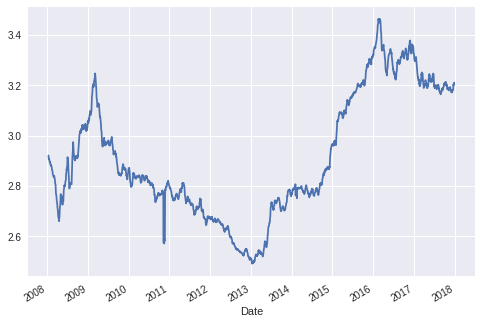

In [ ]:
data_PEN["SMA_10"].plot()

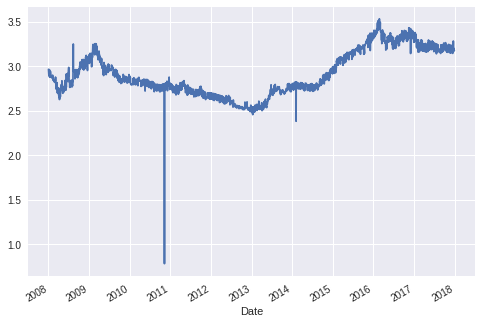

In [ ]:
data_PEN["Close"].plot()

In [ ]:
data_PEN.drop(['Open','High','Low','Adj Close','Volume','CUMLOGRET_1','CUMPCTRET_1'],axis=1, inplace=True)

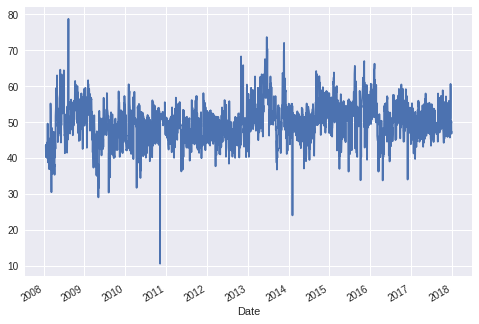

In [ ]:
data_PEN["RSI_14"].plot()

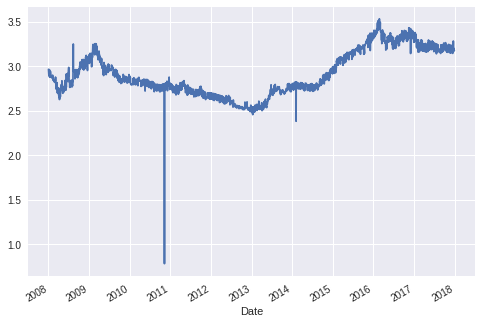

In [ ]:
data_PEN["Close"].plot()

In [ ]:
data_PEN.describe()

,Close,SMA_10,SMA_50,SMA_200,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9
count,2604.000000,2595.000000,2555.000000,2405.000000,2590.000000,2584.000000,2576.000000,2576.000000
mean,2.913787,2.913264,2.911347,2.906054,50.133191,0.000697,0.000032,0.000712
std,0.252106,0.247653,0.246489,0.241255,5.513453,0.015638,0.008036,0.012812
min,0.784400,2.490880,2.506782,2.531280,10.581758,-0.261180,-0.209695,-0.083518
25%,2.732975,2.740265,2.734137,2.738269,46.558016,-0.007003,-0.003152,-0.005747
50%,2.838550,2.837300,2.831632,2.837950,50.612255,0.000612,0.000098,0.000919
75%,3.163025,3.172325,3.165606,3.093651,53.482579,0.008587,0.003367,0.007340
max,3.530000,3.463460,3.407608,3.325279,78.672926,0.058280,0.055734,0.038049


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(data_PEN)
data_PEN=pd.DataFrame(imp.transform(data_PEN),columns=['Close','SMA_10','SMA_50','SMA_200','RSI_14','MACD_8_21_9','MACDh_8_21_9','MACDs_8_21_9'])
data_PEN

,Close,SMA_10,SMA_50,SMA_200,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9
0,2.9640,2.913264,2.911347,2.906054,50.133191,0.000697,0.000032,0.000712
1,2.9363,2.913264,2.911347,2.906054,50.133191,0.000697,0.000032,0.000712
2,2.9307,2.913264,2.911347,2.906054,50.133191,0.000697,0.000032,0.000712
3,2.9065,2.913264,2.911347,2.906054,50.133191,0.000697,0.000032,0.000712
4,2.9292,2.913264,2.911347,2.906054,50.133191,0.000697,0.000032,0.000712
...,...,...,...,...,...,...,...,...
2599,3.1959,3.203170,3.187056,3.198431,49.995670,0.013318,0.003565,0.009753
2600,3.1931,3.205210,3.187200,3.198556,49.661182,0.009635,-0.000094,0.009730
2601,3.1969,3.207200,3.187504,3.198650,50.148629,0.007335,-0.001915,0.009251
2602,3.1702,3.209940,3.187454,3.198605,46.724960,0.002055,-0.005756,0.007812


In [ ]:
scaler=StandardScaler()
scaler=scaler.fit(data_PEN)
df_train_pen=scaler.transform(data_PEN)

In [ ]:
print(df_train_pen)

[[ 1.99210810e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -8.47929853e-19 -8.50962908e-18]
 [ 8.93155525e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -8.47929853e-19 -8.50962908e-18]
 [ 6.70985153e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -8.47929853e-19 -8.50962908e-18]
 ...
 [ 1.12320517e+00  1.18917091e+00  1.13127569e+00 ...  4.26253982e-01
  -2.43709193e-01  6.70192001e-01]
 [ 1.01727791e+00  1.20025610e+00  1.13107088e+00 ...  8.72223304e-02
  -7.24366583e-01  5.57239238e-01]
 [ 1.03394069e+00  1.19742413e+00  1.13188199e+00 ... -1.19751896e-01
  -9.02999473e-01  4.16275246e-01]]


In [ ]:
n_future=1
n_past=10

In [ ]:
train_x=[]
train_y=[]


In [ ]:
for i in range(n_past,len(df_train_pen) - n_future+1):
  train_x.append(df_train_pen[i-n_past:i,0:df_train_pen.shape[1]])
  train_y.append(df_train_pen[i+n_future-1:i+n_future,0])
trainX,trainY=np.array(train_x),np.array(train_y)

In [ ]:
print(trainX.shape)
print(trainY.shape)

(2594, 10, 8)
(2594, 1)


In [ ]:
model_lstm=Sequential()
model_lstm.add(LSTM(units=64,activation = 'relu', return_sequences=True, input_shape=(trainX.shape[1],trainX.shape[2])))
model_lstm.add(Dropout(0.25))
model_lstm.add(LSTM(units=32,activation = 'relu',return_sequences=False))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(units=trainY.shape[1],activation = 'relu'))
model_lstm.add(Dense(units=1,activation='linear'))

In [ ]:
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 64)            18688     
                                                                 
 dropout_10 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 31,139
Trainable params: 31,139
Non-trai

In [ ]:
model_lstm.compile(optimizer='Adam', loss='mean_squared_error',metrics=['mse', 'mae'])

In [ ]:
history=model_lstm.fit(
    trainX,trainY,batch_size=64,epochs=100)

Epoch 1/100
41/41 [==============================] - 4s 16ms/step - loss: 0.7101 - mse: 0.7101 - mae: 0.6969
Epoch 2/100
41/41 [==============================] - 1s 15ms/step - loss: 0.4850 - mse: 0.4850 - mae: 0.5468
Epoch 3/100
41/41 [==============================] - 1s 15ms/step - loss: 0.4361 - mse: 0.4361 - mae: 0.5051
Epoch 4/100
41/41 [==============================] - 1s 16ms/step - loss: 0.4034 - mse: 0.4034 - mae: 0.4802
Epoch 5/100
41/41 [==============================] - 1s 15ms/step - loss: 0.3756 - mse: 0.3756 - mae: 0.4565
Epoch 6/100
41/41 [==============================] - 1s 16ms/step - loss: 0.3527 - mse: 0.3527 - mae: 0.4406
Epoch 7/100
41/41 [==============================] - 1s 16ms/step - loss: 0.3355 - mse: 0.3355 - mae: 0.4255
Epoch 8/100
41/41 [==============================] - 1s 15ms/step - loss: 0.3204 - mse: 0.3204 - mae: 0.4102
Epoch 9/100
41/41 [==============================] - 1s 16ms/step - loss: 0.3014 - mse: 0.3014 - mae: 0.3949
Epoch 10/100
41/41 

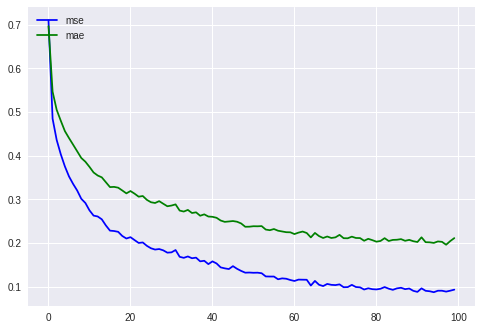

In [ ]:
plt.plot(history.history['mse'],'-b',label='mse')
plt.plot(history.history['mae'],'-g',label='mae')
plt.legend(loc='upper left')
plt.show()

In [ ]:
data_test = yf.download("PEN=X", start="2018-01-01", end="2019-12-30", period="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,3.167700,3.237500,3.167700,3.167700,3.167700,0
2018-01-02,3.164500,3.237700,3.164500,3.165000,3.165000,0
2018-01-03,3.171200,3.231300,3.171200,3.171900,3.171900,0
2018-01-04,3.166700,3.217500,3.166700,3.165500,3.165500,0
2018-01-05,3.148000,3.211800,3.148000,3.150300,3.150300,0
...,...,...,...,...,...,...
2019-12-23,3.269378,3.313000,3.243490,3.313000,3.313000,0
2019-12-24,3.240419,3.317500,3.240419,3.317500,3.317500,0
2019-12-25,3.243933,3.243933,3.243933,3.313000,3.313000,0


In [ ]:
data_test.describe()

,Open,High,Low,Close,Adj Close,Volume
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.0
mean,3.243098,3.312495,3.242367,3.301508,3.301508,0.0
std,0.049110,0.048620,0.048482,0.058197,0.058197,0.0
min,3.122400,3.210900,3.122400,3.129900,3.129900,0.0
25%,3.209450,3.276250,3.209450,3.267100,3.267100,0.0
50%,3.242500,3.312906,3.242500,3.304200,3.304200,0.0
75%,3.280000,3.349350,3.278950,3.340300,3.340300,0.0
max,3.388000,3.405900,3.378000,3.700000,3.700000,0.0


In [ ]:
data_test['Close']=data_test['Close'].replace(0.0,3.30) #50% de los datos close

In [ ]:
data_test.ta.log_return(cumulative=True, append=True)
data_test.ta.percent_return(cumulative=True, append=True)
data_test.tail()

,Open,High,Low,Close,Adj Close,Volume,CUMLOGRET_1,CUMPCTRET_1
Date,,,,,,,,
2019-12-23,3.269378,3.313000,3.243490,3.313000,3.313000,0,0.044848,0.045869
2019-12-24,3.240419,3.317500,3.240419,3.317500,3.317500,0,0.046206,0.047290
2019-12-25,3.243933,3.243933,3.243933,3.313000,3.313000,0,0.044848,0.045869
2019-12-26,3.242661,3.318000,3.242661,3.243933,3.243933,0,0.023781,0.024066
2019-12-27,3.239345,3.325000,3.239345,3.319000,3.319000,0,0.046658,0.047763


In [ ]:
data_test.ta.strategy(CustomStrategy)

In [ ]:
data_test.drop(['Open','High','Low','Adj Close','Volume','CUMLOGRET_1','CUMPCTRET_1'],axis=1, inplace=True)

In [ ]:
data_test.describe()

,Close,SMA_10,SMA_50,SMA_200,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9
count,519.000000,510.000000,470.000000,320.000000,505.000000,499.000000,491.000000,491.000000
mean,3.301508,3.302588,3.304481,3.310040,51.163049,0.002476,-0.000277,0.002457
std,0.058197,0.048800,0.039047,0.018568,6.723781,0.010727,0.005590,0.008534
min,3.129900,3.157760,3.215234,3.254459,27.338994,-0.027091,-0.021734,-0.013784
25%,3.267100,3.268028,3.275890,3.305554,48.059347,-0.005338,-0.003264,-0.004352
50%,3.304200,3.307330,3.309043,3.319235,51.384594,0.001949,0.000232,0.001279
75%,3.340300,3.339487,3.340045,3.321725,54.908175,0.008356,0.002647,0.008051
max,3.700000,3.381890,3.361250,3.328706,80.962017,0.062027,0.048134,0.026719


In [ ]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(data_test)
data_test=pd.DataFrame(imp.transform(data_test),columns=['Close','SMA_10','SMA_50','SMA_200','RSI_14','MACD_8_21_9','MACDh_8_21_9','MACDs_8_21_9'])
data_test

,Close,SMA_10,SMA_50,SMA_200,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9
0,3.167700,3.302588,3.304481,3.310040,51.163049,0.002476,-0.000277,0.002457
1,3.165000,3.302588,3.304481,3.310040,51.163049,0.002476,-0.000277,0.002457
2,3.171900,3.302588,3.304481,3.310040,51.163049,0.002476,-0.000277,0.002457
3,3.165500,3.302588,3.304481,3.310040,51.163049,0.002476,-0.000277,0.002457
4,3.150300,3.302588,3.304481,3.310040,51.163049,0.002476,-0.000277,0.002457
...,...,...,...,...,...,...,...,...
514,3.313000,3.357500,3.353961,3.328197,38.067790,-0.012855,-0.010510,-0.002345
515,3.317500,3.351950,3.354542,3.328309,39.530916,-0.015131,-0.010229,-0.004902
516,3.313000,3.343550,3.353502,3.328706,38.550127,-0.017026,-0.009699,-0.007327
517,3.243933,3.328843,3.351161,3.328433,27.338994,-0.027091,-0.015811,-0.011280


In [ ]:
scaler2=StandardScaler()
scaler=scaler2.fit(data_test)
df_test_pen=scaler2.transform(data_test)

In [ ]:
n_future=1
n_past=10

In [ ]:
test_x=[]
test_y=[]

In [ ]:
for i in range(n_past,len(df_test_pen) - n_future+1):
  test_x.append(df_test_pen[i-n_past:i,0:df_test_pen.shape[1]])
  test_y.append(df_test_pen[i+n_future-1:i+n_future,0])
testX,testY=np.array(test_x),np.array(test_y)

In [ ]:
print(testX.shape)
print(testY.shape)

(509, 10, 8)
(509, 1)


In [ ]:
predictions=model_lstm.predict(testX)

16/16 [==============================] - 0s 4ms/step


In [ ]:
print(predictions.shape)


(509, 1)


In [ ]:
preds=predictions.reshape(-1,1)

In [ ]:
preds = scaler2.inverse_transform(preds)

ValueError: ignored

In [ ]:
#metricas
# RMSE
print("Resultados de metricas")
print('Test RSME',np.sqrt(metrics.mean_squared_error(testY, predictions)))
k = metrics.mean_absolute_error(testY, predictions)
print('Test Mean Absolute Error', k )
print('Test r2', metrics.r2_score(testY,predictions) )

Resultados de metricas
Test RSME 0.6328799567117163
Test Mean Absolute Error 0.4130092952054736
Test r2 0.5639028285882852


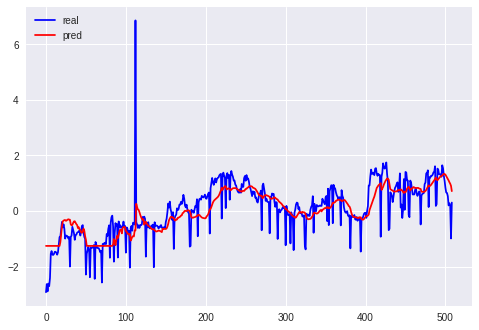

In [ ]:
plt.plot(testY, '-b',label='real')
plt.plot(predictions, '-r',label='pred')
plt.legend(loc='upper left')
plt.show()